In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno
import squarify

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

In [2]:
wine_150k = pd.read_csv('winemag-data_first150k.csv',index_col=0)
wine_130k = pd.read_csv('winemag-data-130k-v2.csv',index_col=0)
df = pd.concat([wine_150k,wine_130k],axis=0)
#wine = wine_150k
print("Number of rows and columns:",df.shape)

Number of rows and columns: (280901, 13)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280901 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   variety                280900 non-null  object 
 9   winery                 280901 non-null  object 
 10  taster_name            103727 non-null  object 
 11  taster_twitter_handle  98758 non-null   object 
 12  title                  129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 30.0+ MB


## Missing Values

Text(0.5, 1.0, 'Count of Missing values')

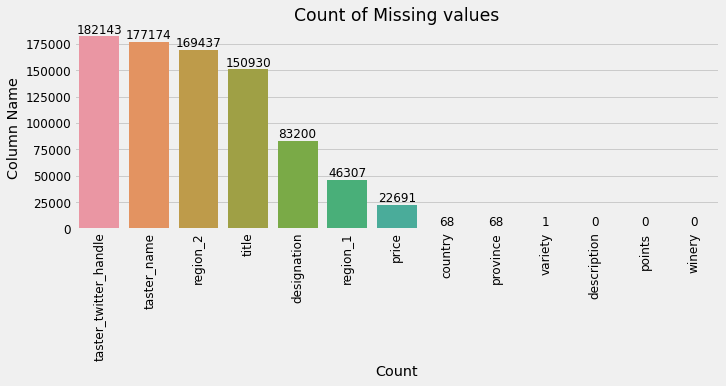

In [4]:
data=pd.Series(df.isna().sum()).sort_values(ascending=False)
plt.figure(figsize=(10,5))

# make barplot
ax=sns.barplot(y=data, x=data.index, orient='v')

# add count values to the bars
ax.bar_label(ax.containers[0])

# adjust xticks
plt.xticks(rotation=90)
plt.tight_layout()

# label graph
plt.xlabel('Count')
plt.ylabel('Column Name')
plt.title("Count of Missing values")

## Wine review distribution by countries

In [5]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


Number of distinct countries in the dataset:  50


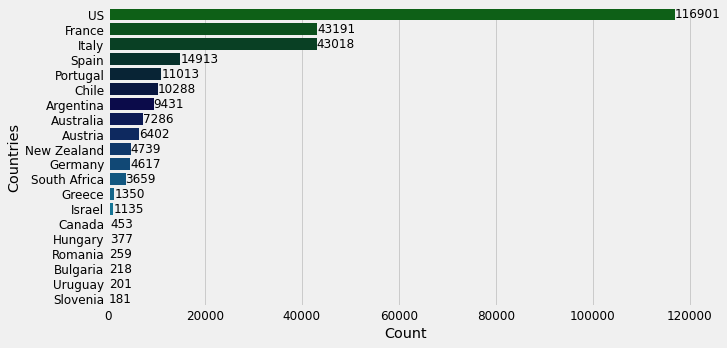

In [6]:
print("Number of distinct countries in the dataset: ", df['country'].nunique())

cnt=pd.Series(df['country'].value_counts().nlargest(20))

plt.figure(figsize=(10,5))
ax=sns.barplot(x=cnt, y=cnt.index, palette='ocean')

# add count values to the bars
ax.bar_label(ax.containers[0])
plt.tight_layout()

# label graph
plt.xlabel('Count')
plt.ylabel('Countries');

## Distribution of Wine Prices

In [7]:
df.isna().sum()

country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
variety                       1
winery                        0
taster_name              177174
taster_twitter_handle    182143
title                    150930
dtype: int64

In [8]:
# fill missing prices with mean prices of wach country
df['price'] = df['price'].fillna(df.groupby('country')['price'].transform('mean'))

In [9]:
df.isna().sum()

country                      68
description                   0
designation               83200
points                        0
price                        10
province                     68
region_1                  46307
region_2                 169437
variety                       1
winery                        0
taster_name              177174
taster_twitter_handle    182143
title                    150930
dtype: int64

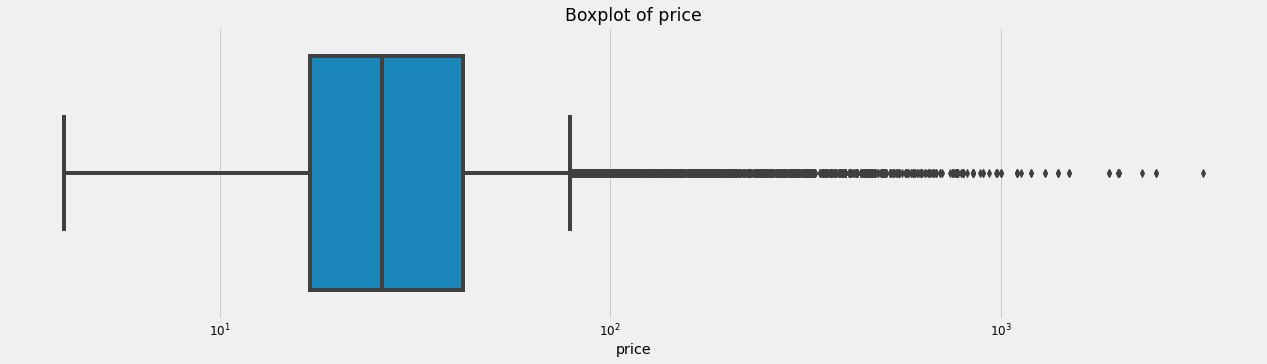

In [10]:
plt.figure(figsize=(20,5))

ax=sns.boxplot(x = df['price'])
plt.xscale('log')
ax.set_title('Boxplot of price');

In [11]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)

IQR=Q3-Q1

print('First Quantile ===================', Q1)
print('Third Quantile ===================', Q3)
print('Inter Quantile Range ===================', IQR)

First Quantile =================== 17.0
Third Quantile =================== 42.0
Inter Quantile Range =================== 25.0


## Country Wise Average Wine Price

In [12]:
cnt=pd.Series(df.groupby('country').price.mean().sort_values(ascending=False))
cnt

country
Switzerland               63.909091
England                   51.246753
US-France                 50.000000
France                    43.173705
Hungary                   42.829333
Germany                   40.551824
Italy                     38.550423
Canada                    35.243304
US                        35.014888
Luxembourg                33.733333
Australia                 32.592237
Israel                    31.511374
Austria                   30.964597
Lebanon                   27.986111
Mexico                    27.879699
Spain                     27.569063
Slovenia                  26.447205
Portugal                  26.271020
Uruguay                   26.159794
Turkey                    25.050000
New Zealand               25.027878
Serbia                    24.384615
Croatia                   24.188312
Japan                     24.000000
Brazil                    22.430556
South Africa              22.426629
Argentina                 22.288451
Czech Republic      

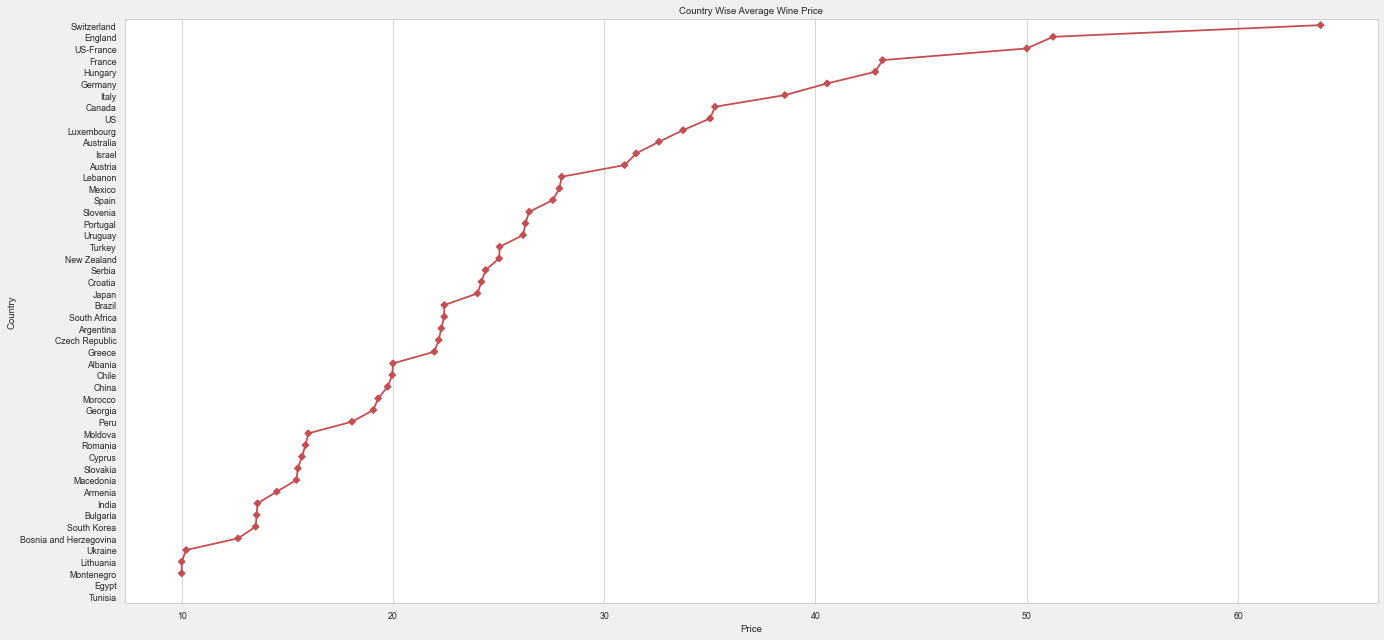

In [13]:
plt.figure(figsize=(20,10))

sns.set(style="whitegrid")                                                 
paper_rc = {'lines.linewidth': 1.0, 'lines.markersize': 20}                  
sns.set_context("paper", rc = paper_rc)   

sns.pointplot(x=cnt, y=cnt.index, color='r',orient='h',markers='D')
plt.title('Country Wise Average Wine Price')
plt.xlabel('Price')
plt.ylabel('Country');

## Country Wise Least & Most Expensive Wine

In [14]:
max_price=pd.Series(df.groupby('country').price.max().sort_values(ascending=False)[:15])
min_price=pd.Series(df.groupby('country').price.min().sort_values(ascending=False)[:15])

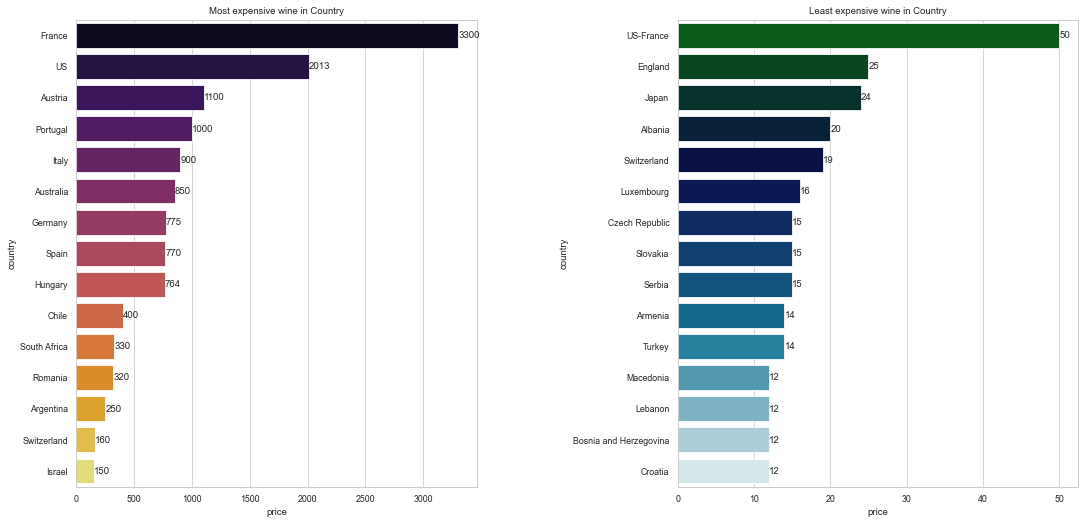

In [15]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

sns.barplot(x=max_price, y=max_price.index, palette='inferno', ax=ax1)
ax1.set_title('Most expensive wine in Country')
ax1.bar_label(ax1.containers[0])

sns.barplot(x=min_price, y=min_price.index, palette='ocean', ax=ax2)
ax2.set_title('Least expensive wine in Country')
ax2.bar_label(ax2.containers[0])

plt.subplots_adjust(wspace=0.5);

## Country wise boxplot of Wine Prices

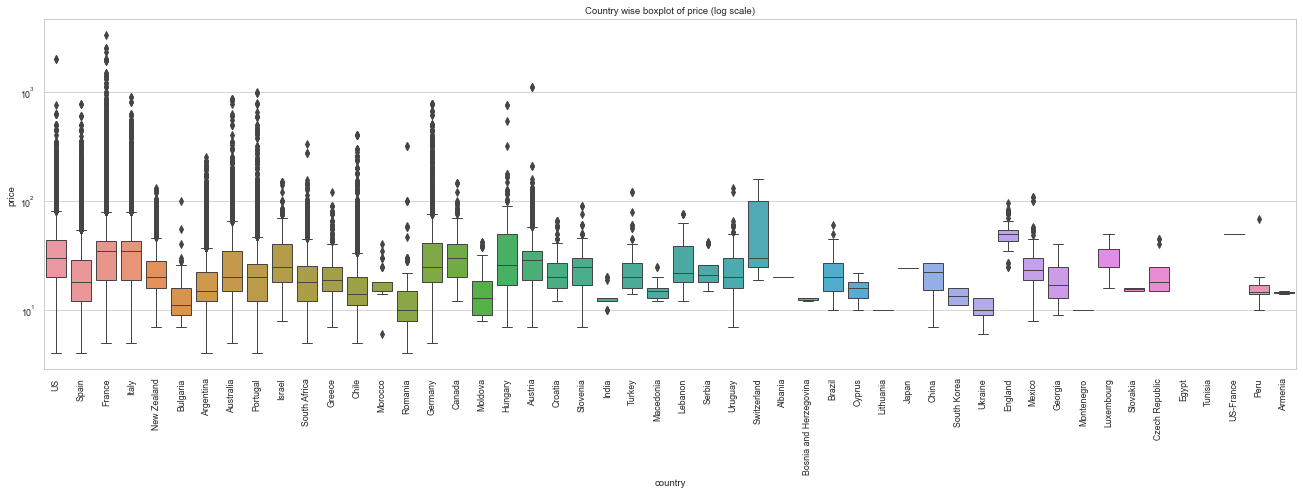

In [16]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df['country'], y=df['price'])
plt.yscale('log')
plt.title('Country wise boxplot of price (log scale)')
plt.xticks(rotation=90);

## Price v/s Points 

In [18]:
df=df.reset_index()

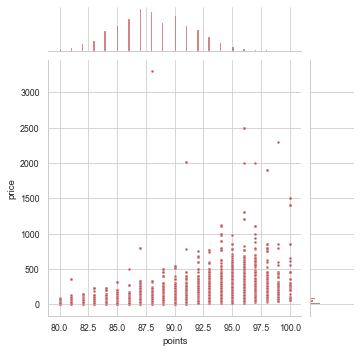

In [32]:
sns.jointplot(x='points', 
              y='price', 
              data=df, 
              s=7.0, 
              color='r', 
              height=5);

## Wine v/s Variety

### Grapes used for most expensive wine

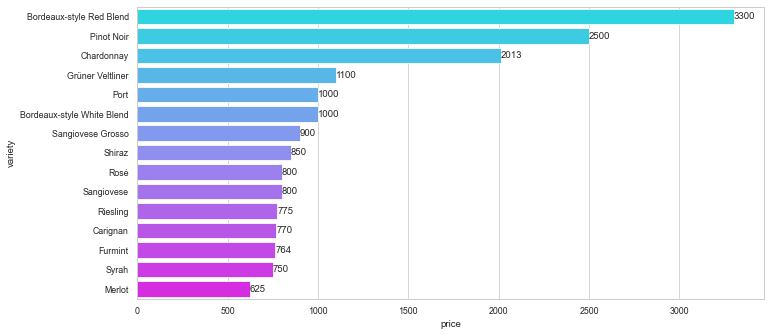

In [36]:
plt.figure(figsize=(10,5))

expensive_wine=pd.Series(df.groupby('variety').price.max().sort_values(ascending=False)[:15])
ax=sns.barplot(x=expensive_wine, y=expensive_wine.index, palette='cool')
ax.bar_label(ax.containers[0]);

In [52]:
wine_pivot=df.groupby(['country','points'])['price'].agg(['count','min','max','mean']).round(2).sort_values(by='mean', ascending=False)[:10]
wine_pivot.reset_index(inplace=True)
wine_pivot.style.background_gradient(cmap='PuBu', high=0.5)

,country,points,count,min,max,mean
0,France,100,12,150.000000,1500.000000,877.580000
1,Germany,98,1,775.000000,775.000000,775.000000
2,Australia,99,2,300.000000,850.000000,575.000000
3,Portugal,100,2,450.000000,650.000000,550.000000
4,Spain,98,3,440.000000,450.000000,446.670000
5,Portugal,99,3,268.000000,426.000000,373.330000
6,Germany,97,17,40.550000,775.000000,371.860000
7,Italy,100,11,195.000000,550.000000,334.550000
8,Portugal,98,3,127.000000,595.000000,317.330000
9,Australia,100,4,300.000000,350.000000,312.500000


In [53]:
province_pivot=df.groupby(['province','country','points']).price.agg(['count','mean','min','max']).sort_values(by='mean', ascending=False)[:10]
province_pivot.reset_index(inplace=True)
province_pivot.style.background_gradient(cmap='PuBu', high=0.5)

,province,country,points,count,mean,min,max
0,Champagne,France,100,6,887.666667,250.000000,1400.000000
1,Bordeaux,France,100,6,867.500000,150.000000,1500.000000
2,South Australia,Australia,99,1,850.000000,850.000000,850.000000
3,Rheingau,Germany,98,1,775.000000,775.000000,775.000000
4,Port,Portugal,100,1,650.000000,650.000000,650.000000
5,Burgundy,France,99,1,560.000000,560.000000,560.000000
6,Rheingau,Germany,97,7,551.571429,445.000000,775.000000
7,Colares,Portugal,93,1,495.000000,495.000000,495.000000
8,Champagne,France,99,4,488.750000,385.000000,800.000000
9,Northern Spain,Spain,98,2,450.000000,450.000000,450.000000


## Province v/s Price

In [61]:
provinces=pd.Series(df.groupby('region_1').price.mean().sort_values(ascending=False)[:20])

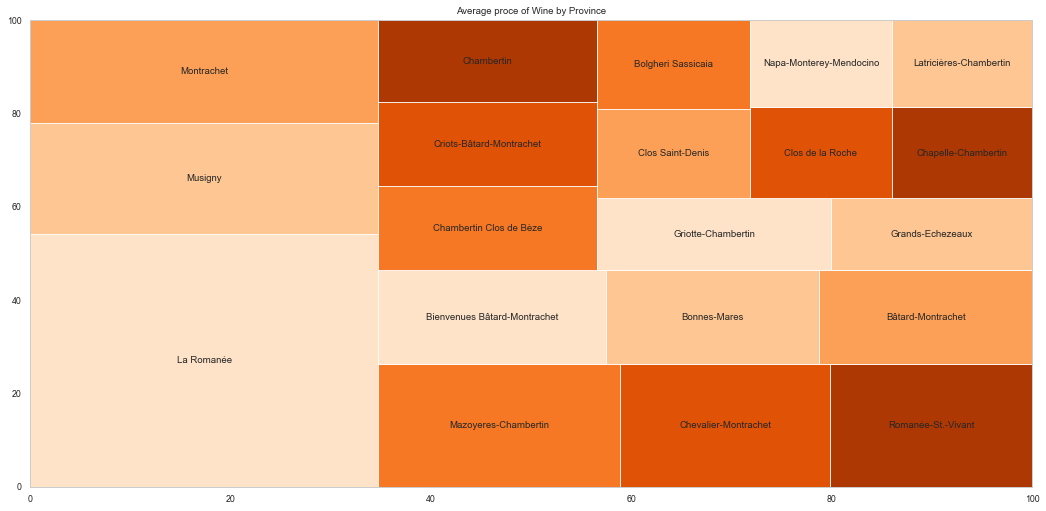

In [62]:
plt.figure(figsize=(16,8))
squarify.plot(provinces, label=provinces.index, color=sns.color_palette('Oranges'))
plt.title('Average proce of Wine by Province');

### Region 2 Analysis

In [69]:
cnt=df.groupby(['country','province','region_1','region_2','points']).price.agg(['count','mean','min','max']).sort_values(by='mean',ascending=False)[:20]
cnt.reset_index(inplace=True)
cnt.style.set_table_styles([{'selector': 'tr:hover',
                             'props': [('background-color', 'blue')]
                            }])

,country,province,region_1,region_2,points,count,mean,min,max
0,US,California,Sonoma County,Sonoma,100,1,450.000000,450.000000,450.000000
1,US,California,Sonoma County,Sonoma,97,2,450.000000,450.000000,450.000000
2,US,California,Sonoma County,Sonoma,98,2,300.000000,300.000000,300.000000
3,US,California,Stags Leap District,Napa,98,1,265.000000,265.000000,265.000000
4,US,California,Atlas Peak,Napa,99,1,250.000000,250.000000,250.000000
5,US,California,Rutherford,Napa,100,2,245.000000,245.000000,245.000000
6,US,California,Napa Valley,Napa,99,7,238.571429,150.000000,300.000000
7,US,California,St. Helena,Napa,98,3,228.333333,185.000000,250.000000
8,US,California,Napa Valley,Napa,98,11,226.818182,75.000000,625.000000
9,US,California,Stags Leap District,Napa,100,1,215.000000,215.000000,215.000000


## Taster Analysis

In [72]:
df[['taster_name','taster_twitter_handle']].describe().T

,count,unique,top,freq
taster_name,103727,19,Roger Voss,25514
taster_twitter_handle,98758,15,@vossroger,25514


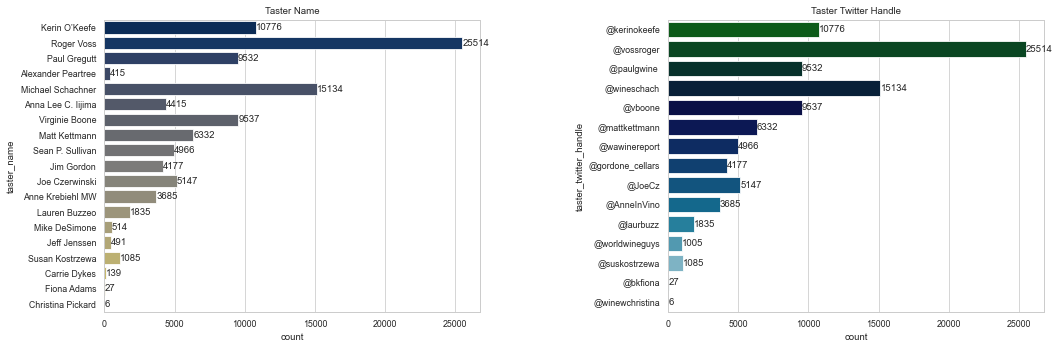

In [81]:
f,ax=plt.subplots(1,2,figsize=(15,5))
ax1, ax2 = ax.flatten()

sns.countplot(y=df['taster_name'], palette='cividis', ax=ax1)
ax1.set_title('Taster Name')
ax1.bar_label(ax1.containers[0]);

sns.countplot(y=df['taster_twitter_handle'], palette='ocean', ax=ax2)
ax2.set_title('Taster Twitter Handle')
ax2.bar_label(ax2.containers[0])

plt.subplots_adjust(wspace=0.5);